# LOGISTIC REGRESSION

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [2]:
Data_train = pd.read_csv("Titanic_train.csv")
Data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
Data_test = pd.read_csv('Titanic_test.csv')
Data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
Data_train.shape

(891, 12)

In [10]:
Data_test.shape

(418, 11)

In [12]:
#Dropping trhe passengerId and Name columns as it is not required
Data_train.drop(['PassengerId','Name','Cabin','Ticket'],inplace = True, axis = 1)
Data_test.drop(['PassengerId','Name','Cabin','Ticket'],inplace = True, axis = 1)

In [14]:
Data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [16]:
Data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [18]:
Data_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [20]:
Data_test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [22]:
import seaborn as sns
sns.color_palette('Set3')

[(0.5529411764705883, 0.8274509803921568, 0.7803921568627451),
 (1.0, 1.0, 0.7019607843137254),
 (0.7450980392156863, 0.7294117647058823, 0.8549019607843137),
 (0.984313725490196, 0.5019607843137255, 0.4470588235294118),
 (0.5019607843137255, 0.6941176470588235, 0.8274509803921568),
 (0.9921568627450981, 0.7058823529411765, 0.3843137254901961),
 (0.7019607843137254, 0.8705882352941177, 0.4117647058823529),
 (0.9882352941176471, 0.803921568627451, 0.8980392156862745),
 (0.8509803921568627, 0.8509803921568627, 0.8509803921568627),
 (0.7372549019607844, 0.5019607843137255, 0.7411764705882353),
 (0.8, 0.9215686274509803, 0.7725490196078432),
 (1.0, 0.9294117647058824, 0.43529411764705883)]

<Axes: >

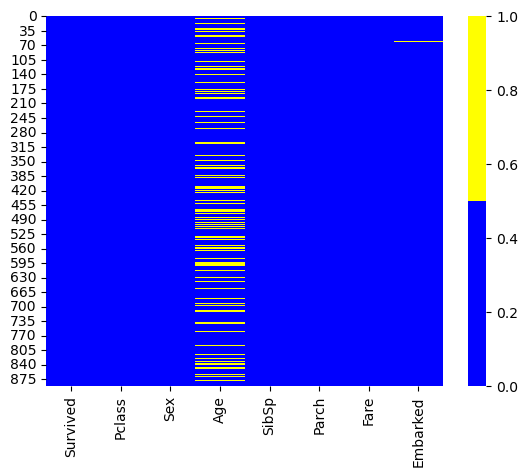

In [23]:
cols = Data_train.columns
colours = ['blue','yellow']
sns.heatmap(Data_train[cols].isnull(),cmap=colours)

<Axes: >

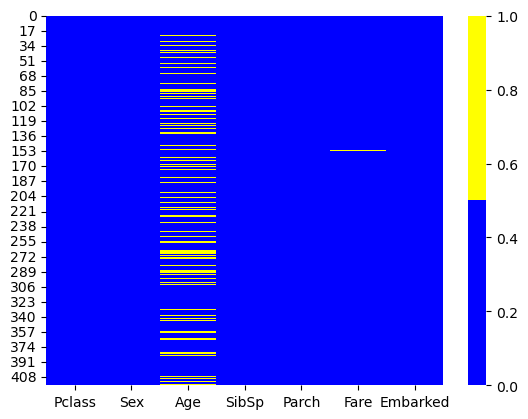

In [24]:
cols = Data_test.columns
colours = ['blue','yellow']
sns.heatmap(Data_test[cols].isnull(),cmap=colours)

In [25]:
Data_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [27]:
Data_test.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [32]:
mean = Data_train['Age'].mean()
print(mean)
Data_train.loc[:,'Age'] = Data_train['Age'].fillna(mean)

29.69911764705882


In [34]:
mean = Data_test['Age'].mean()
print(mean)
Data_test.loc[:,'Age'] = Data_test['Age'].fillna(mean)

30.272590361445783


In [36]:
mean = Data_test['Fare'].mean()
print(mean)
Data_test.loc[:,'Fare'] = Data_test['Fare'].fillna(mean)

35.627188489208635


<Axes: xlabel='Embarked'>

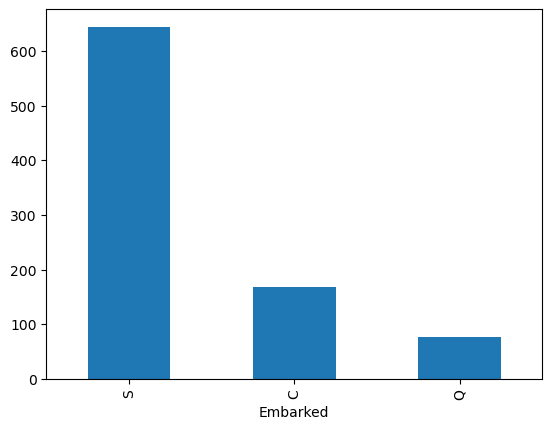

In [38]:
Data_train.Embarked.value_counts().plot(kind='bar')

In [40]:
#Mode = df['Embarked'].mode()
#print(Mode)
Mode = Data_train.Embarked.mode()[0]
Mode
Data_train.loc[:,'Embarked'] = Data_train.Embarked.fillna(Mode)

In [42]:
Data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [44]:
Data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [46]:
Data_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [48]:
Data_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [50]:
# Histogram Numerical Variables

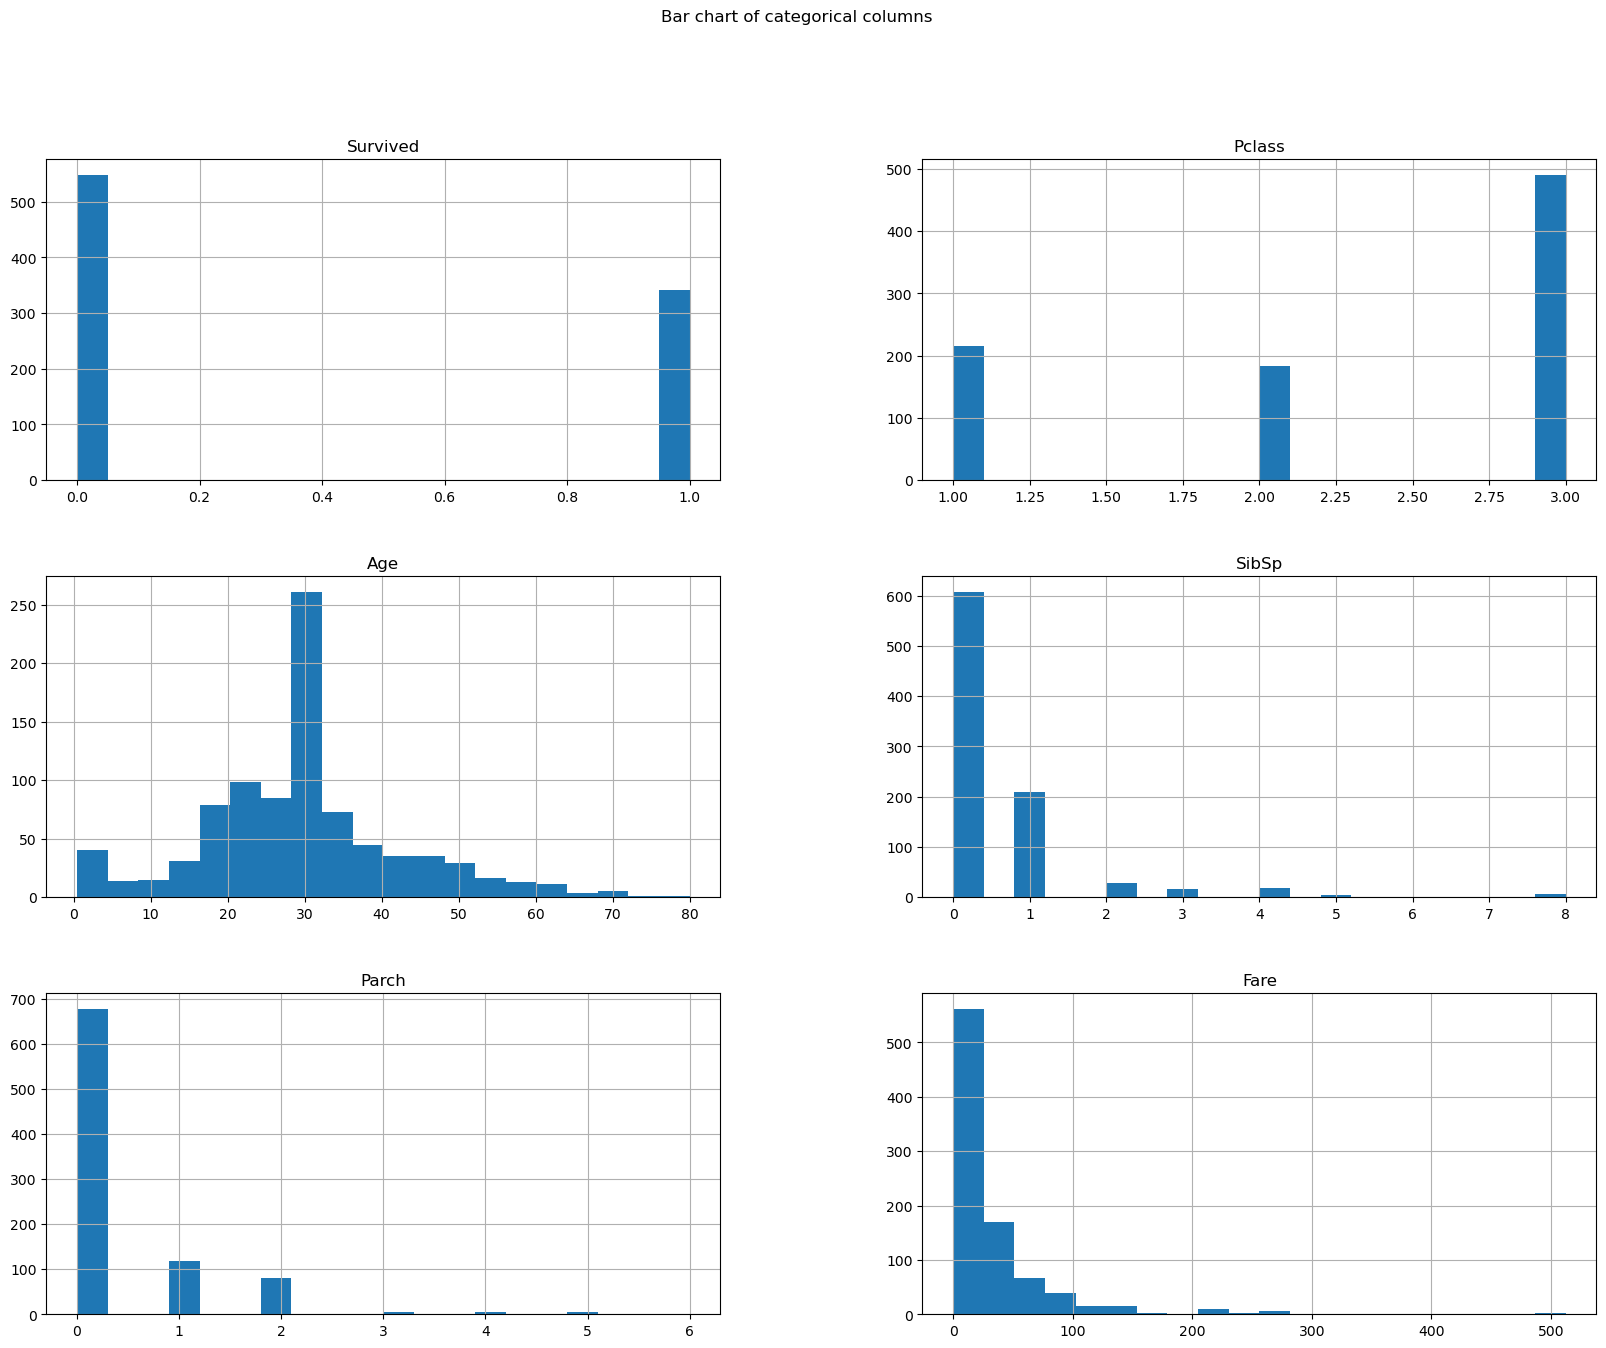

In [52]:
import matplotlib.pyplot as plt
Data_train.hist(bins = 20, figsize = (20,15))
plt.suptitle("Bar chart of categorical columns")
plt.show()

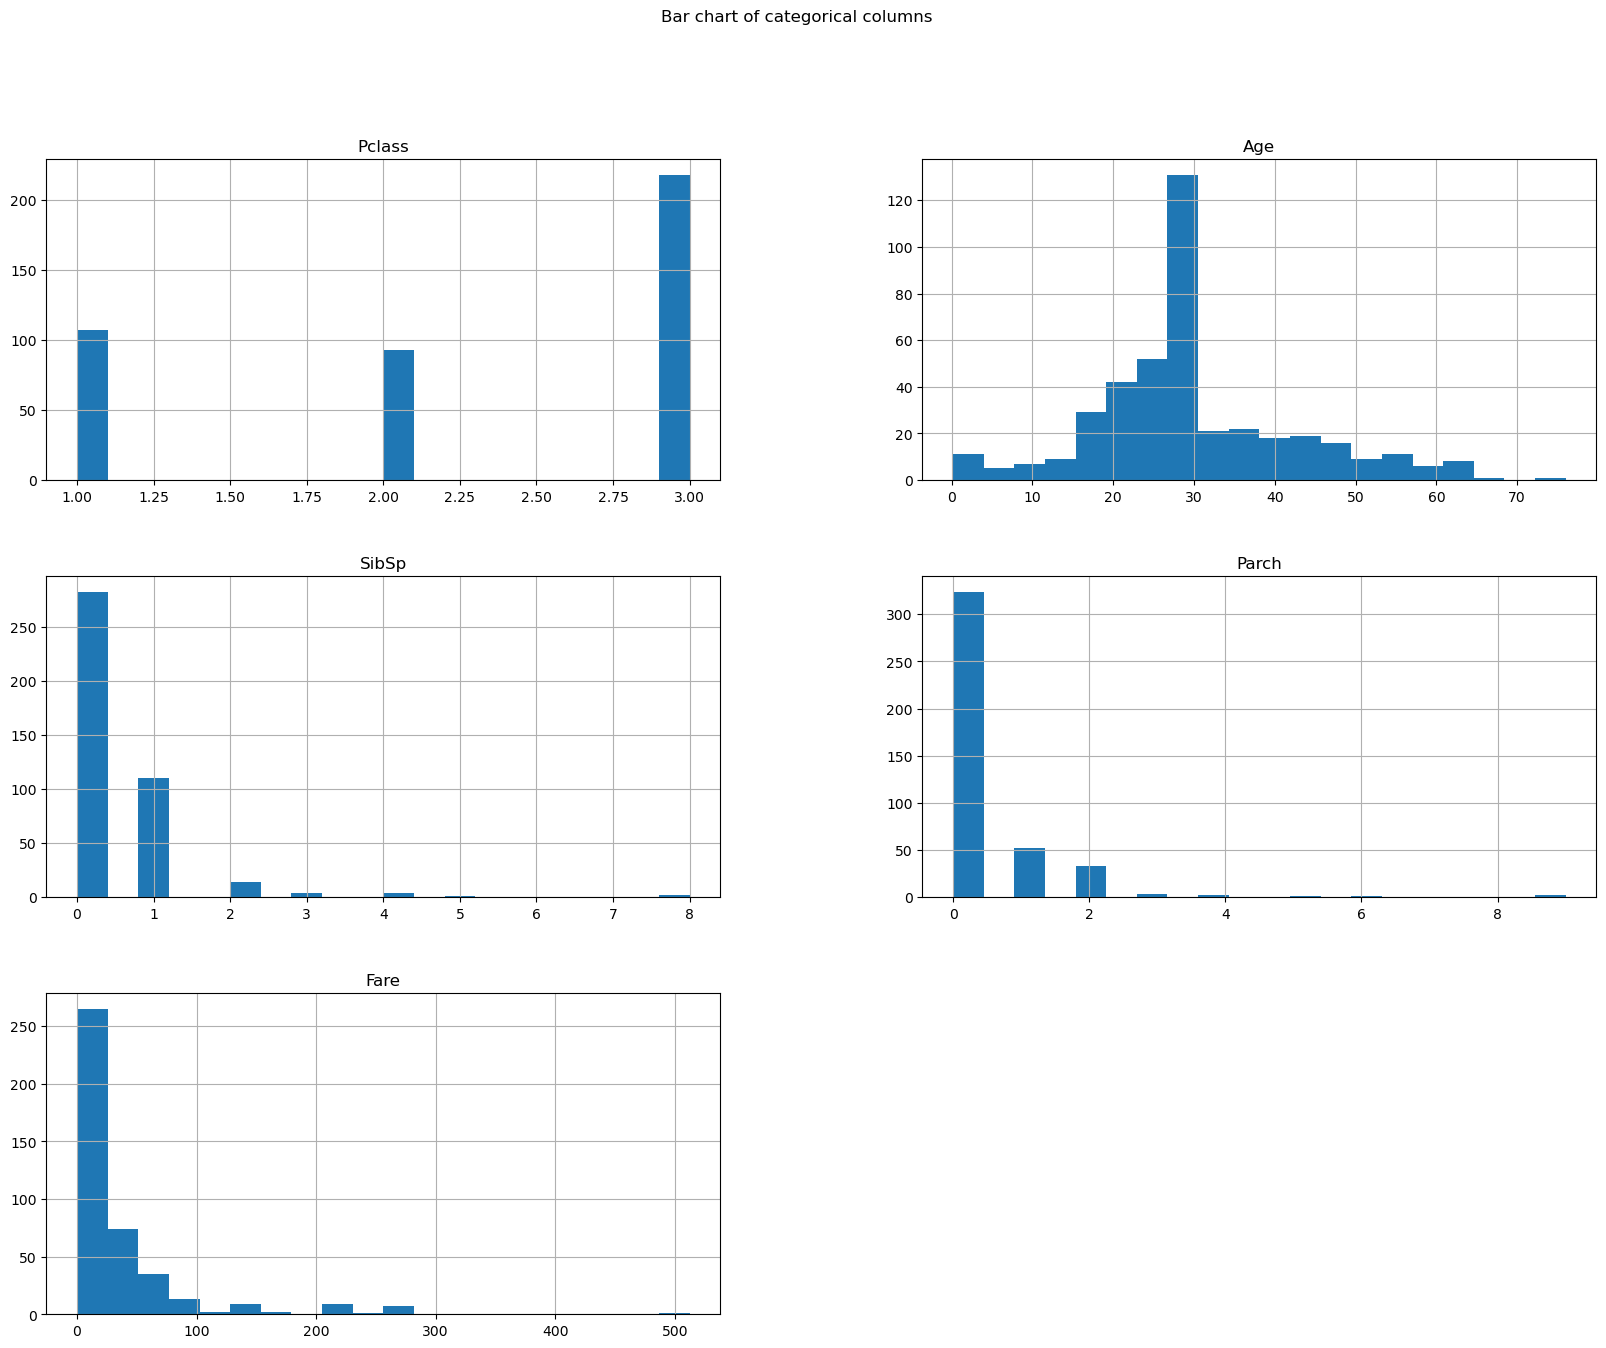

In [53]:
import matplotlib.pyplot as plt
Data_test.hist(bins = 20, figsize = (20,15))
plt.suptitle("Bar chart of categorical columns")
plt.show()

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns 

In [58]:
Categorical_columns = ['Survived', 'Pclass', 'SibSp', 'Parch']


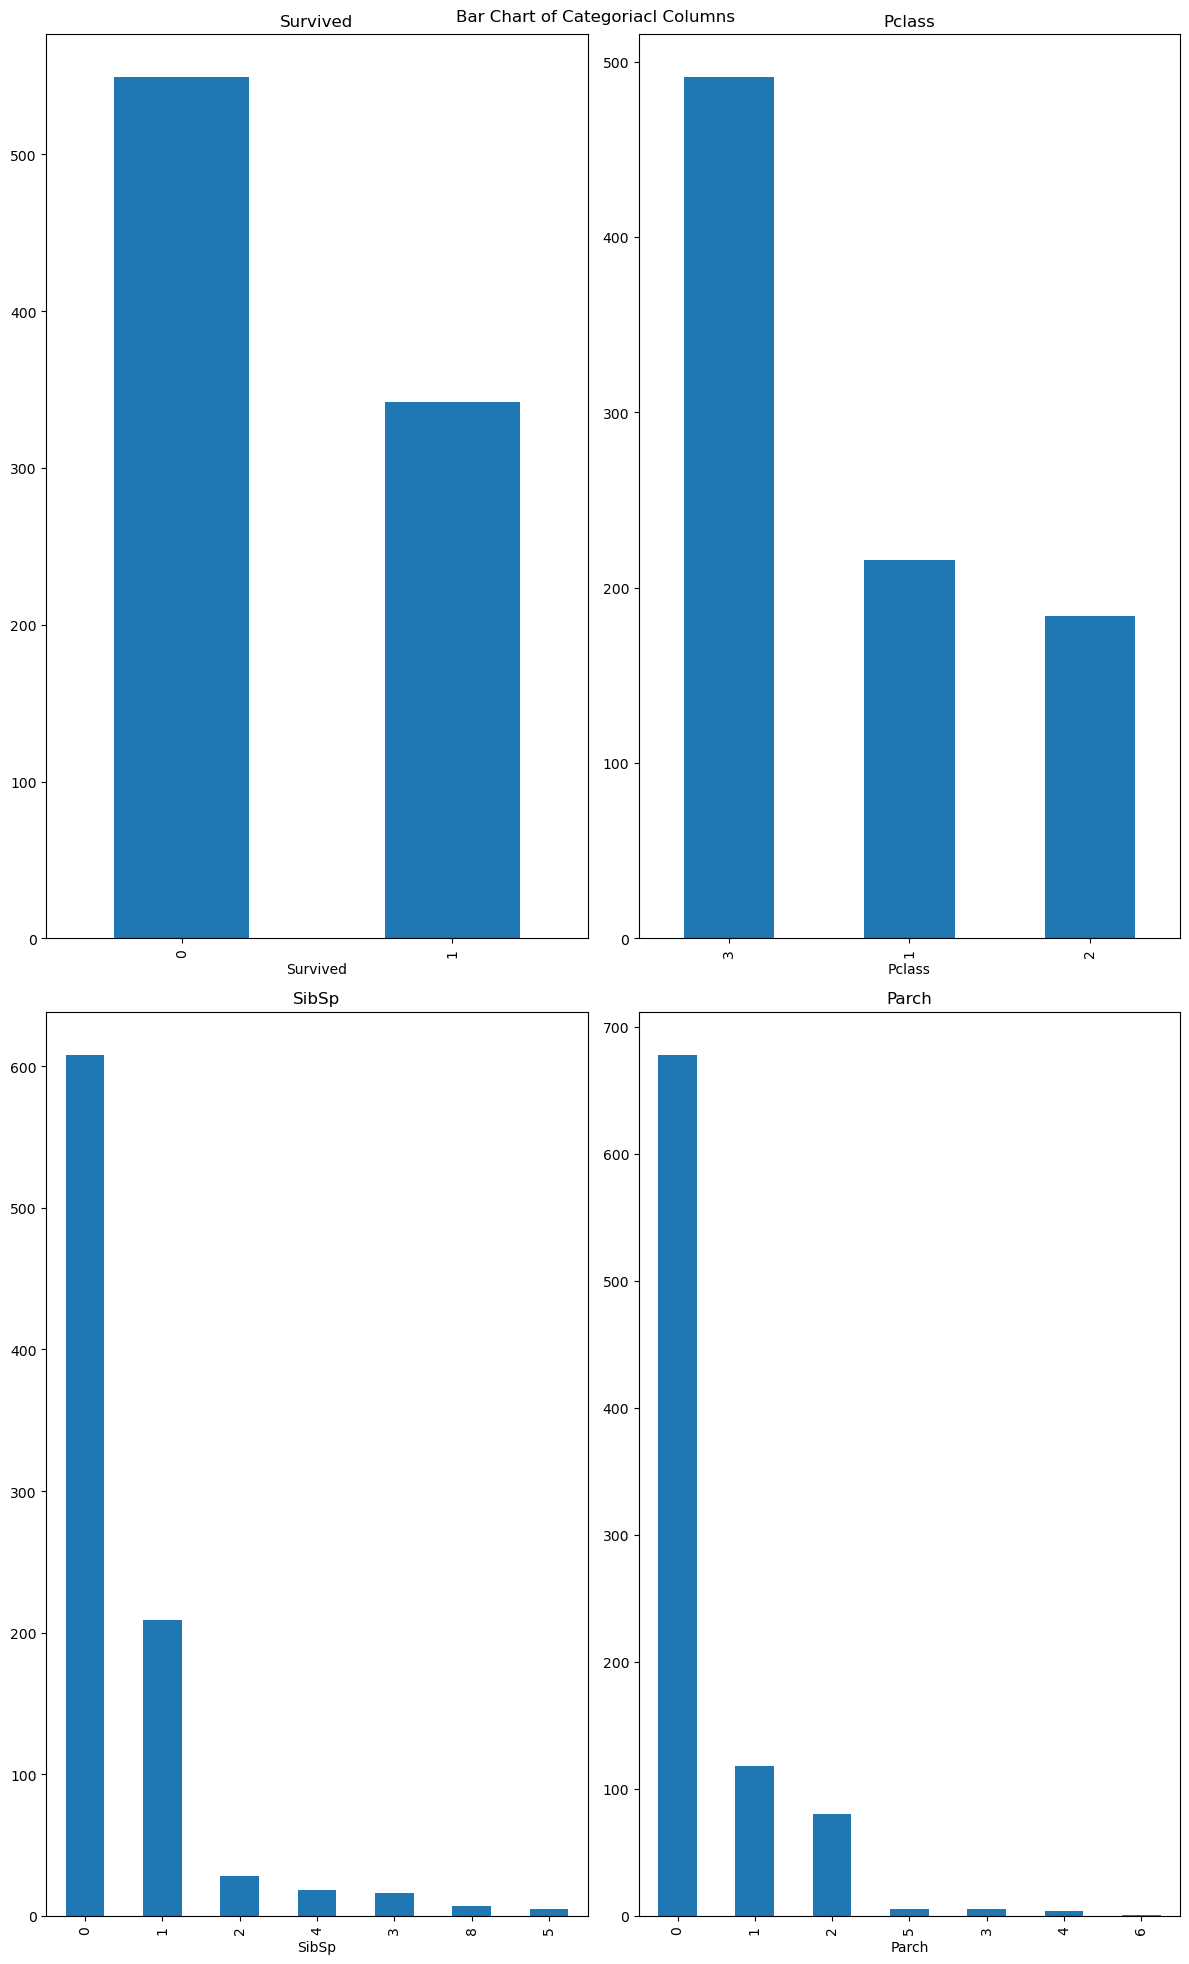

In [60]:
plt.figure(figsize=(12,20))
for i, column in enumerate(Categorical_columns, 1):
    plt.subplot(2,2,i)
    Data_train[column].value_counts().plot(kind= 'bar')
    plt.title(column)
plt.suptitle('Bar Chart of Categoriacl Columns')
plt.tight_layout()
plt.show()

In [62]:
Categorical_columns = [ 'Pclass', 'SibSp', 'Parch']

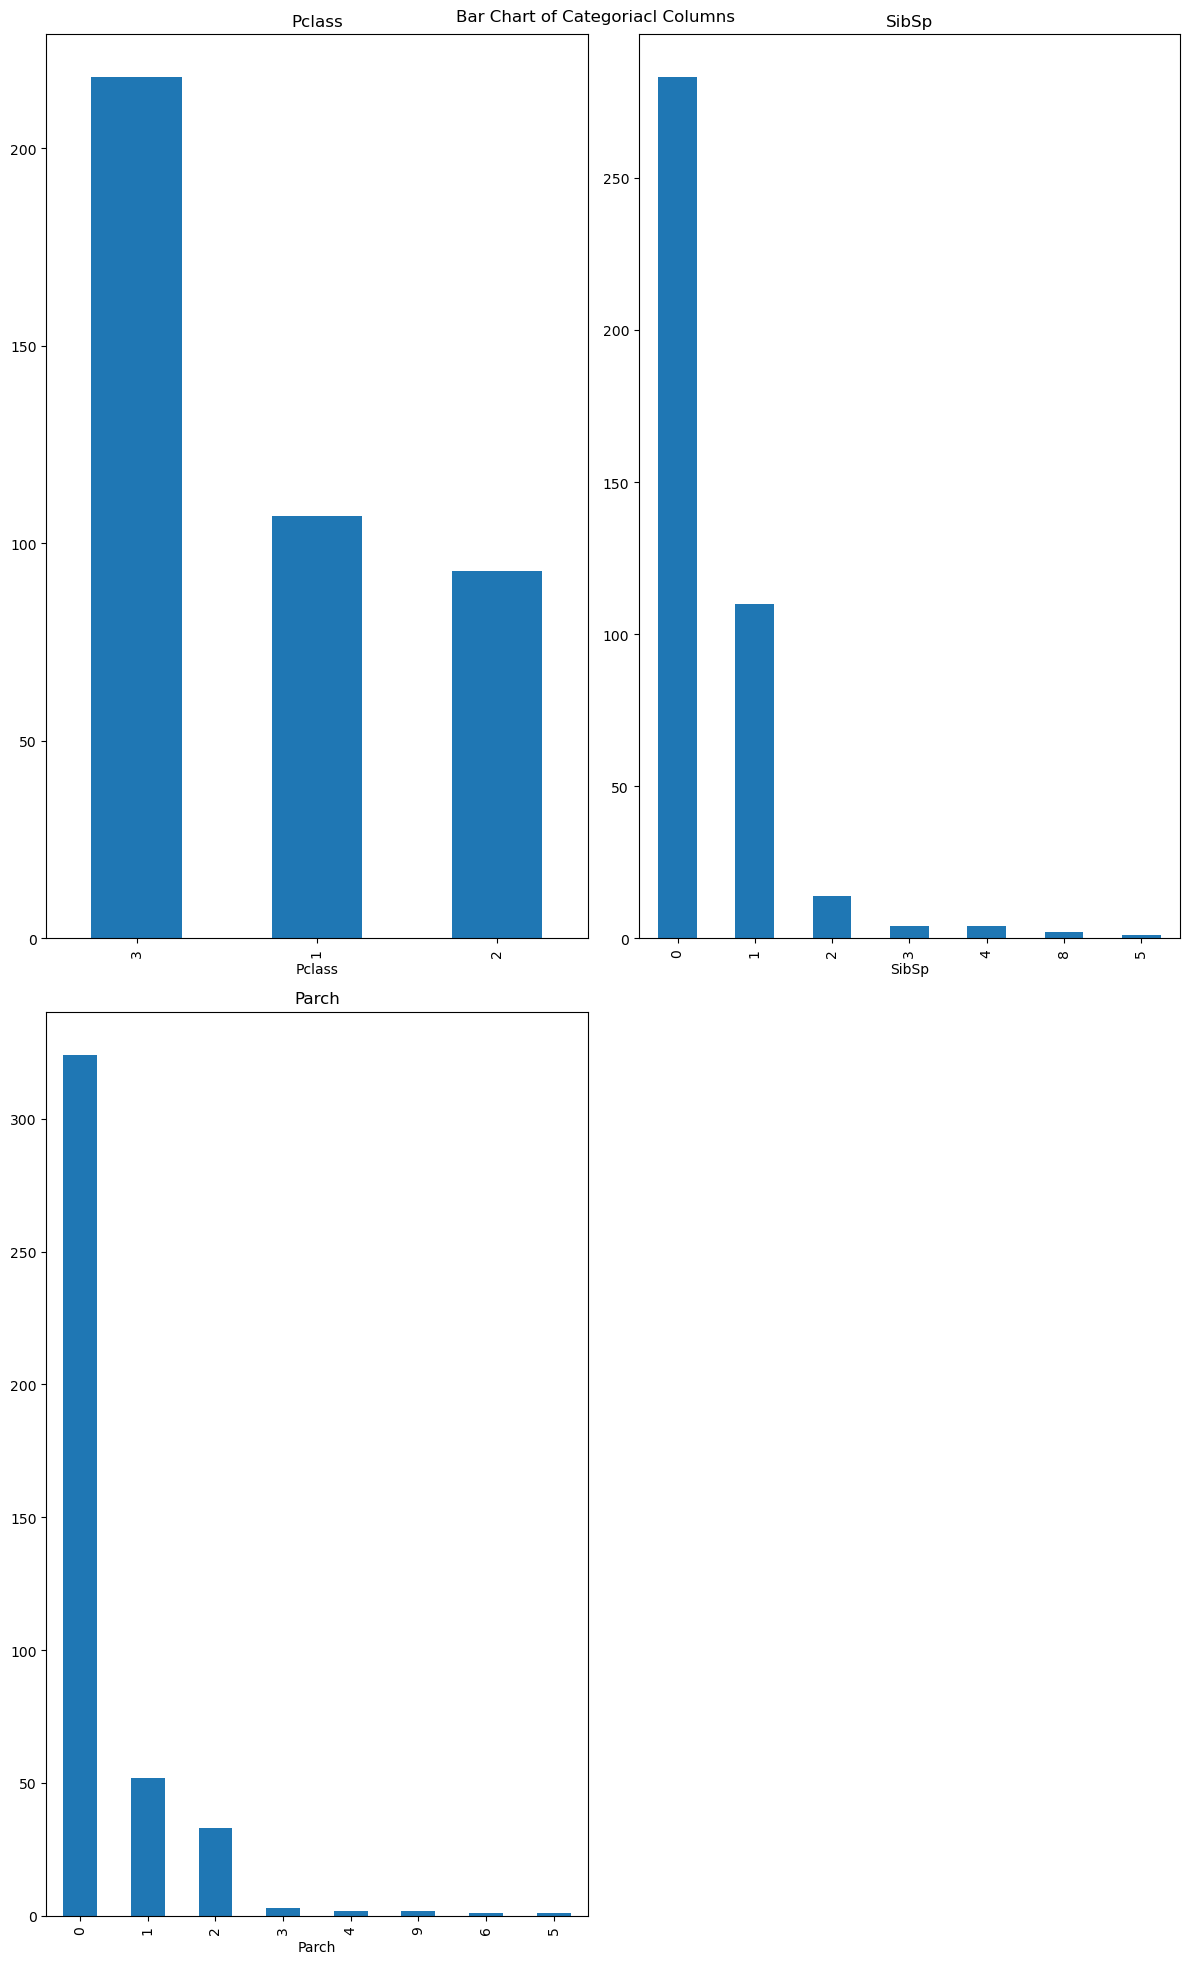

In [64]:
plt.figure(figsize=(12,20))
for i, column in enumerate(Categorical_columns, 1):
    plt.subplot(2,2,i)
    Data_test[column].value_counts().plot(kind= 'bar')
    plt.title(column)
plt.suptitle('Bar Chart of Categoriacl Columns')
plt.tight_layout()
plt.show()

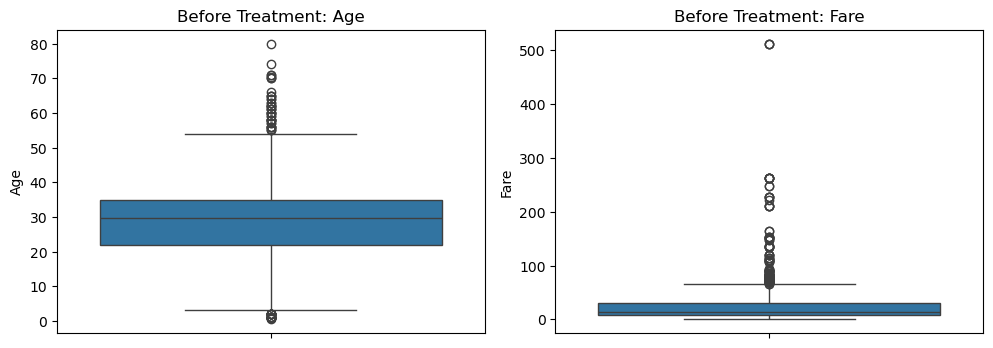

In [66]:
import numpy as np
import seaborn as sns
# Select numerical columns
numerical_cols = ['Age','Fare']

# Function to detect and treat outliers using IQR
def treat_outliers_iqr(Data_train, column):
    Q1 = Data_train[column].quantile(0.25)
    Q3 = Data_train[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap outliers
    Data_train[column] = np.where(Data_train[column] < lower_bound, lower_bound, Data_train[column])
    Data_train[column] = np.where(Data_train[column] > upper_bound, upper_bound, Data_train[column])
    return Data_train

# Visualize outliers before treatment
plt.figure(figsize=(20, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=Data_train[col])
    plt.title(f'Before Treatment: {col}')
plt.tight_layout()
plt.show()


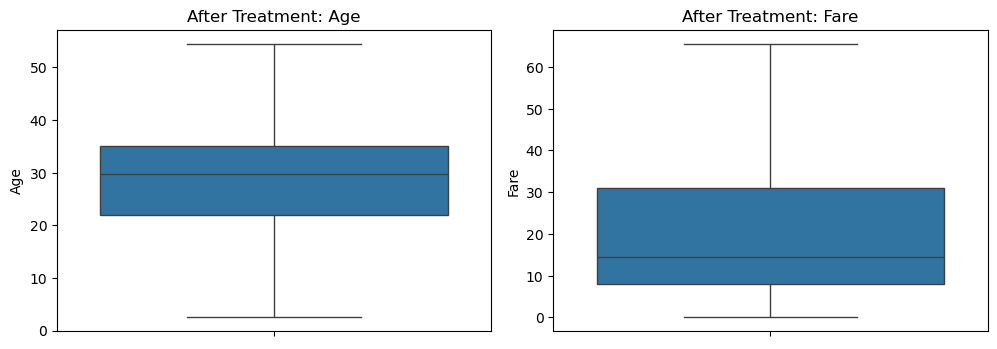

In [68]:
#Treat outliers for all numerical columns
for col in numerical_cols:
    df = treat_outliers_iqr(Data_train, col)

# Visualize outliers after treatment
plt.figure(figsize=(20, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3,4, i)
    sns.boxplot(y=Data_train[col])
    plt.title(f'After Treatment: {col}')
plt.tight_layout()
plt.show()


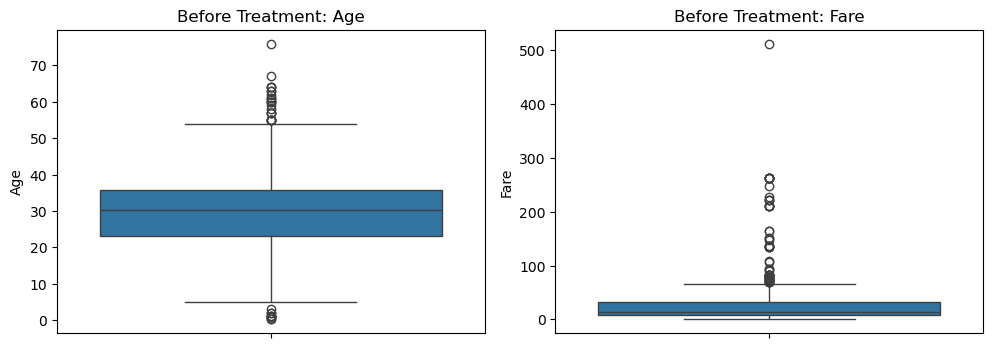

In [70]:
import numpy as np
import seaborn as sns
# Select numerical columns
numerical_cols = ['Age','Fare']

# Function to detect and treat outliers using IQR
def treat_outliers_iqr(Data_test, column):
    Q1 = Data_test[column].quantile(0.25)
    Q3 = Data_test[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap outliers
    Data_test[column] = np.where(Data_test[column] < lower_bound, lower_bound, Data_test[column])
    Data_test[column] = np.where(Data_test[column] > upper_bound, upper_bound, Data_test[column])
    return Data_test

# Visualize outliers before treatment
plt.figure(figsize=(20, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=Data_test[col])
    plt.title(f'Before Treatment: {col}')
plt.tight_layout()
plt.show()


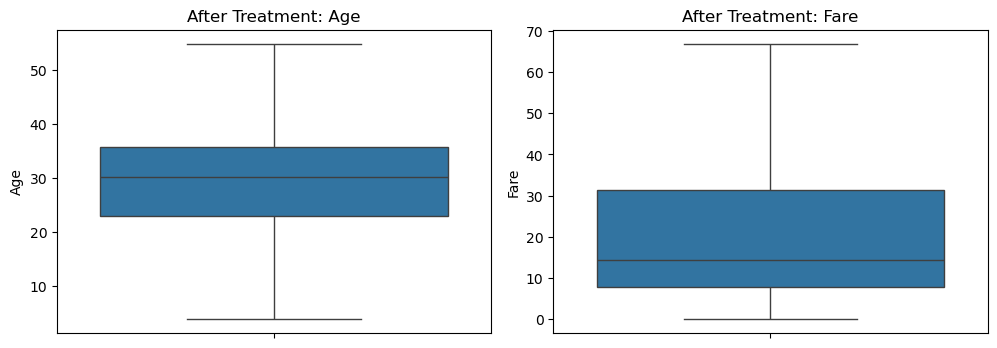

In [72]:
#Treat outliers for all numerical columns
for col in numerical_cols:
    Data_Test = treat_outliers_iqr(Data_test, col)

# Visualize outliers after treatment
plt.figure(figsize=(20, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=Data_test[col])
    plt.title(f'After Treatment: {col}')
plt.tight_layout()
plt.show()


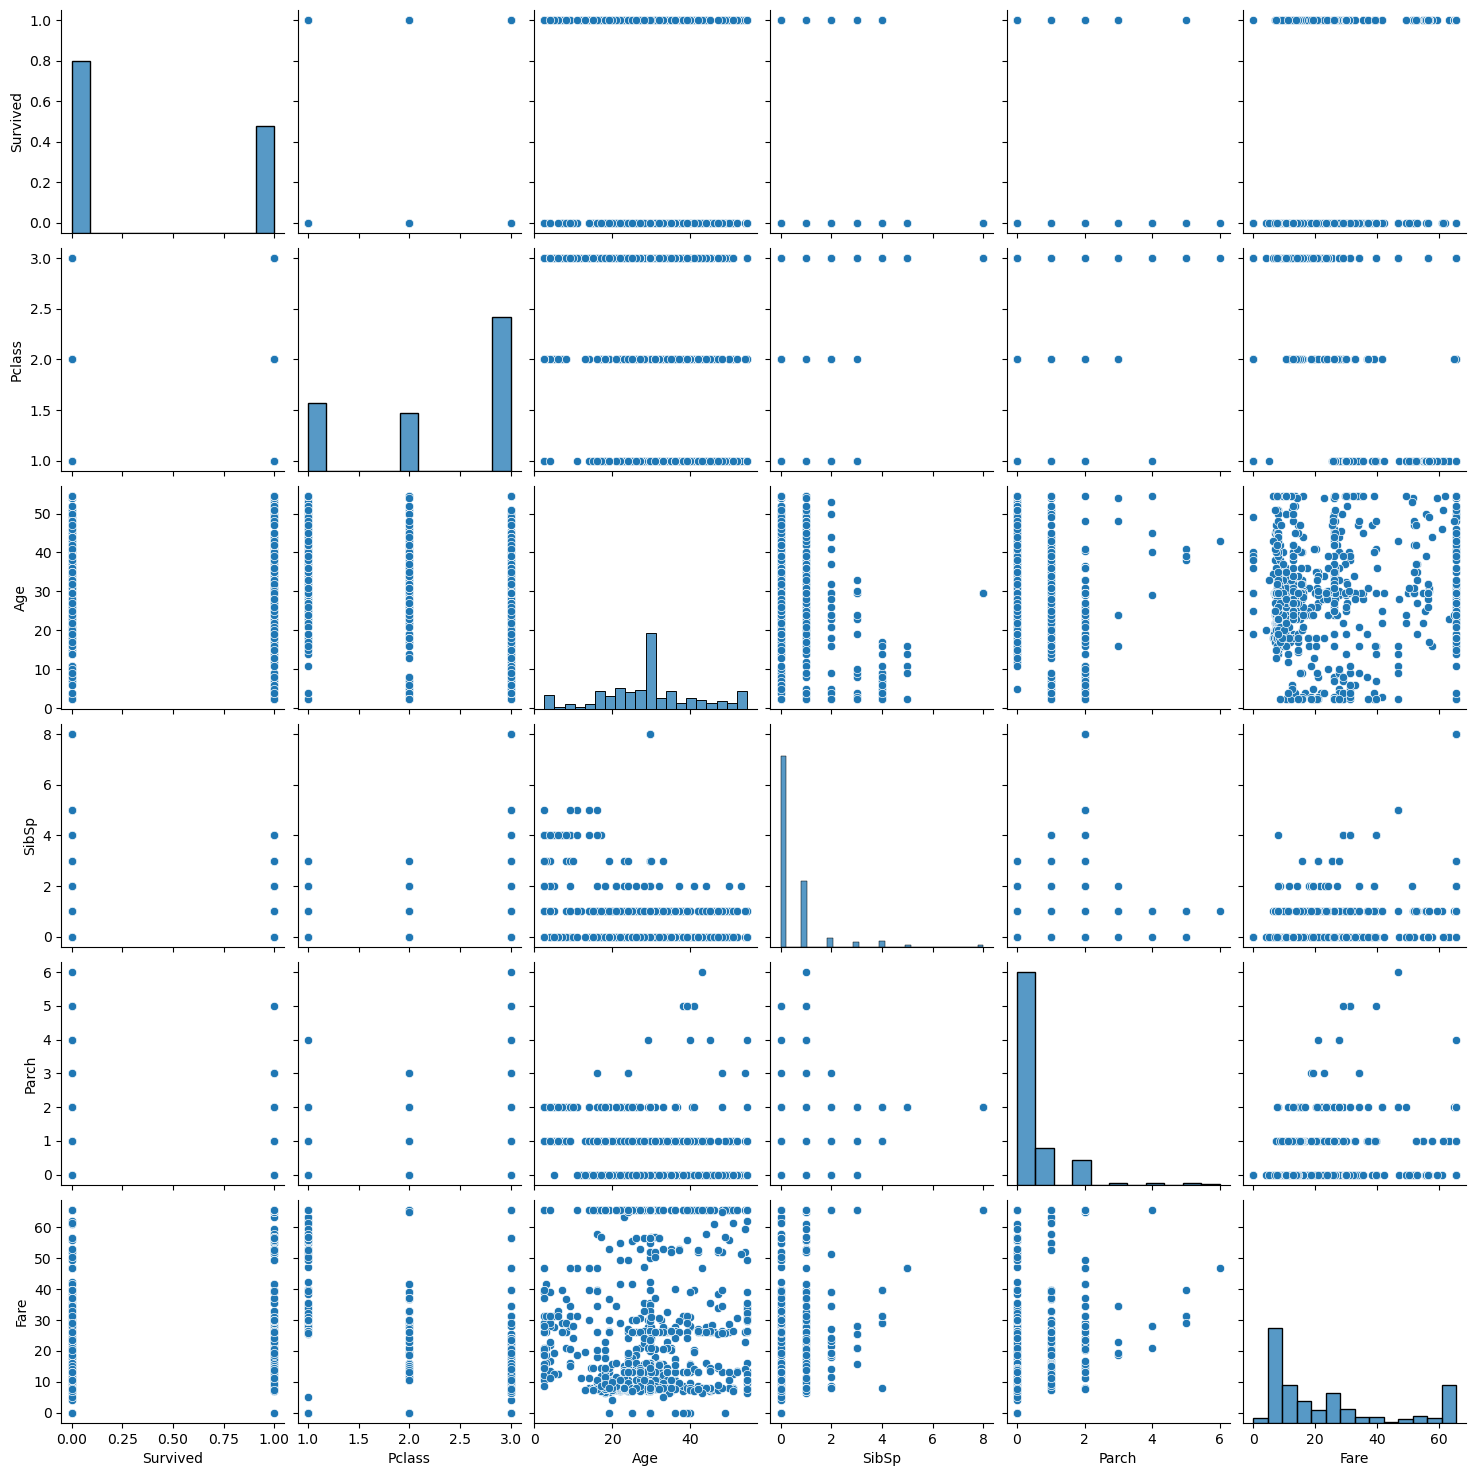

In [74]:
sns.pairplot(data=Data_train) 

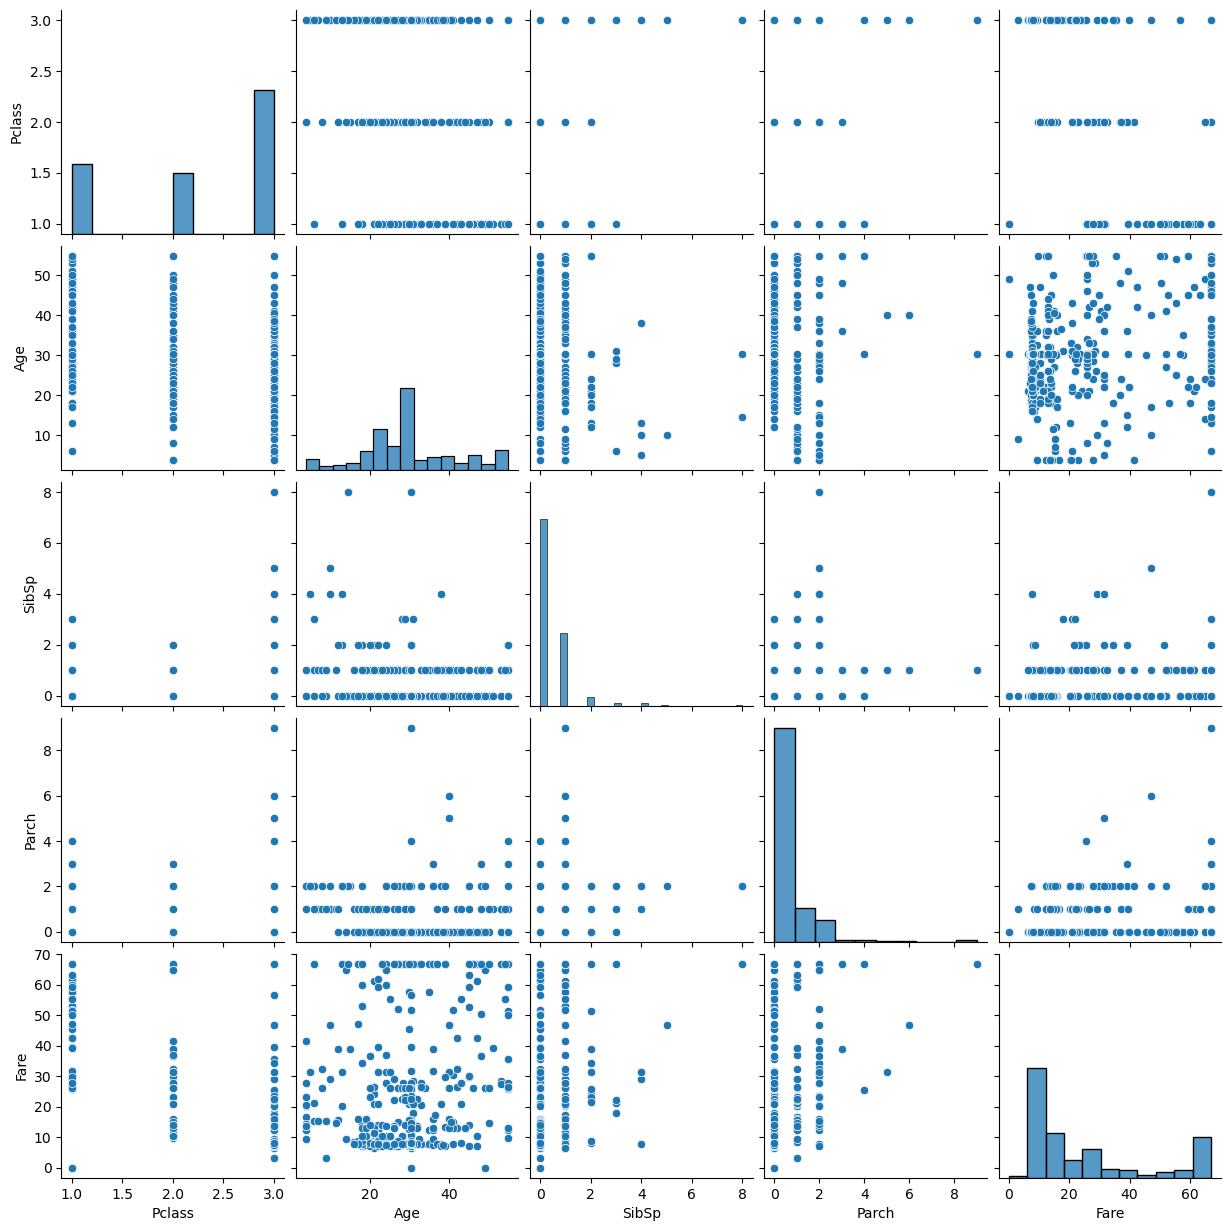

In [75]:
sns.pairplot(data=Data_test) 

In [78]:
df_num = Data_train.select_dtypes('number')
df_num.corr(method = ('pearson'))


,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.065857,-0.035322,0.081629,0.317430
Pclass,-0.338481,1.000000,-0.330962,0.083081,0.018443,-0.715300
Age,-0.065857,-0.330962,1.000000,-0.238735,-0.186087,0.137498
SibSp,-0.035322,0.083081,-0.238735,1.000000,0.414838,0.332021
Parch,0.081629,0.018443,-0.186087,0.414838,1.000000,0.292616
Fare,0.317430,-0.715300,0.137498,0.332021,0.292616,1.000000


<Axes: >

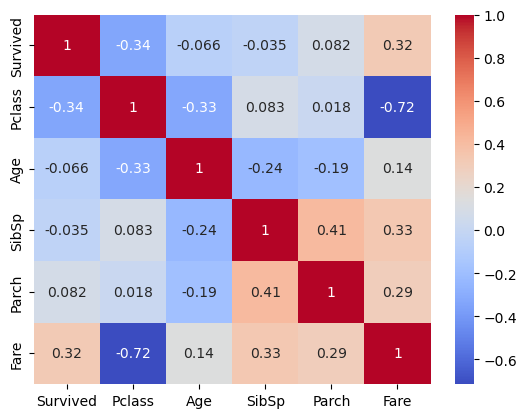

In [80]:
sns.heatmap(df_num.corr(),annot =True,cmap="coolwarm")

In [81]:
df_num = Data_test.select_dtypes('number')
df_num.corr(method = ('pearson'))

,Pclass,Age,SibSp,Parch,Fare
Pclass,1.000000,-0.441413,0.001087,0.018721,-0.746547
Age,-0.441413,1.000000,-0.092328,-0.046323,0.330804
SibSp,0.001087,-0.092328,1.000000,0.306895,0.302179
Parch,0.018721,-0.046323,0.306895,1.000000,0.314485
Fare,-0.746547,0.330804,0.302179,0.314485,1.000000


<Axes: >

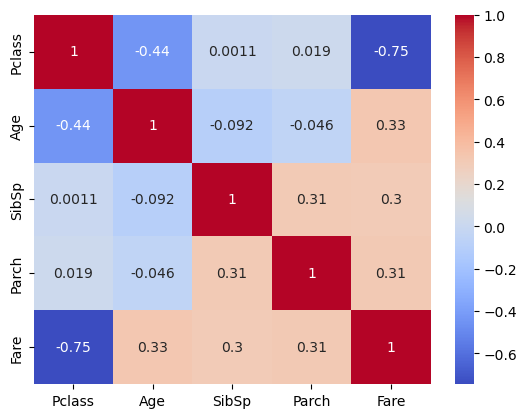

In [84]:
sns.heatmap(df_num.corr(),annot =True,cmap="coolwarm")

# Data Preprocessing

In [86]:
from sklearn.preprocessing import LabelEncoder
categorical_col = Data_train.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_col:
    Data_train[col] = le.fit_transform(Data_train[col])
Data_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,65.6344,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [88]:
from sklearn.preprocessing import LabelEncoder
categorical_col = Data_test.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_col:
    Data_test[col] = le.fit_transform(Data_test[col])
Data_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.500,0,0,7.8292,1
1,3,0,47.000,1,0,7.0000,2
2,2,1,54.875,0,0,9.6875,1
3,3,1,27.000,0,0,8.6625,2
4,3,0,22.000,1,1,12.2875,2


In [90]:
Data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 48.9 KB


In [92]:
Data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int32  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    int32  
dtypes: float64(2), int32(2), int64(3)
memory usage: 19.7 KB


# Model Building

In [96]:
# Dividing our Data into input and output variables
X_train = Data_train.drop('Survived', axis = 1)

y_train = Data_train['Survived']
X_test = Data_test

In [98]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,65.6344,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [100]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [104]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix,classification_report
classifier = LogisticRegression(max_iter=500)
classifier.fit(X_train, y_train)


LogisticRegression(max_iter=500)

In [106]:
# Predict for X Dataset
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [108]:
print('accuracy:' , accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='weighted'))
print('Recall:', recall_score(y_test, y_pred,average = 'weighted'))
print('F1 Score:' , f1_score(y_test, y_pred, average='weighted'))
print('Confusion Matrix:\n' ,confusion_matrix(y_test, y_pred))
print('Classification Report:' , classification_report(y_test, y_pred))

accuracy: 0.8044692737430168
Precision: 0.8034756111025241
Recall: 0.8044692737430168
F1 Score: 0.8033245174988711
Confusion Matrix:
 [[90 15]
 [20 54]]
Classification Report:               precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



In [110]:
classifier.predict_proba(X_test)

array([[0.89673071, 0.10326929],
       [0.79957139, 0.20042861],
       [0.85907476, 0.14092524],
       [0.09371814, 0.90628186],
       [0.2503835 , 0.7496165 ],
       [0.04816182, 0.95183818],
       [0.34111065, 0.65888935],
       [0.90591376, 0.09408624],
       [0.24224137, 0.75775863],
       [0.08926454, 0.91073546],
       [0.63752636, 0.36247364],
       [0.93403274, 0.06596726],
       [0.63875452, 0.36124548],
       [0.85255062, 0.14744938],
       [0.82091542, 0.17908458],
       [0.05814659, 0.94185341],
       [0.67889042, 0.32110958],
       [0.34084718, 0.65915282],
       [0.76956303, 0.23043697],
       [0.63629677, 0.36370323],
       [0.87531809, 0.12468191],
       [0.61741791, 0.38258209],
       [0.38809703, 0.61190297],
       [0.85672874, 0.14327126],
       [0.88611026, 0.11388974],
       [0.93121541, 0.06878459],
       [0.5639642 , 0.4360358 ],
       [0.79357458, 0.20642542],
       [0.91639673, 0.08360327],
       [0.39974252, 0.60025748],
       [0.

In [112]:
Y_pred_df = pd.DataFrame({'actual': y_test,'predicted_prob': classifier.predict_proba(X_test)[:,1],'y_predictions':y_pred})

In [114]:
Y_pred_df

,actual,predicted_prob,y_predictions
709,1,0.103269,0
439,0,0.200429,0
840,0,0.140925,0
720,1,0.906282,1
39,1,0.749616,1
...,...,...,...
433,0,0.152659,0
773,0,0.148785,0
25,1,0.336852,0
84,1,0.847013,1


In [116]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix

In [118]:
confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[90 15]
 [20 54]]


In [120]:
#Accuracy = TP+TN/(TP+TN+FP+FN)
Accuracy = ((463+238)/(463+86+104+238))*100
Accuracy

78.67564534231201

# MOdel Evaluation

In [122]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



# ROC_AUC_SCORE

Text(0, 0.5, 'True Positive rate')

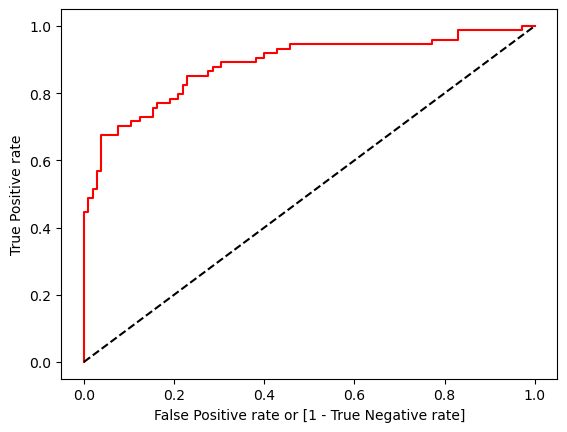

In [126]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba (X_test)[:,1])
auc = roc_auc_score(y_test,y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color='red', label='logit model (area = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive rate or [1 - True Negative rate]')
plt.ylabel('True Positive rate')

In [128]:
auc

0.7934362934362935

# Interpretation

In [130]:
# Display coefficients
coefficients = pd.DataFrame({'Feature': Data_test.columns, 'Coefficient': classifier.coef_[0]})
print(coefficients)

    Feature  Coefficient
0    Pclass    -0.772987
1       Sex    -2.602310
2       Age    -0.035191
3     SibSp    -0.373508
4     Parch    -0.162486
5      Fare     0.014804
6  Embarked    -0.207574
